In [2]:
import numpy as np
from AstroBkgInterp import AstroBkgInterp
from matplotlib import pyplot as plt
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

In [59]:
hdu = fits.open('jw01433-o010_t001_nircam_clear-f277w_i2d.fits')
data = hdu[1].data
err = hdu[2].data
stamp = data[165:235,350:420]
errstamp = err[165:235,350:420]

In [86]:
bi = AstroBkgInterp()

bi.src_y = 34
bi.src_x = 33

bi.aper_rad = 4
bi.ann_width = 3

bi.k = 2
bi.bin_size = 5

bi.kernel = None

bi.bkg_mode = 'polynomial'
bi.combine_fits = False

bi.pool_size = 1
bi.cube_resolution = 'high'

diff, bkg, mask, sigma = bi.run(stamp, err=errstamp)

Source Masking: circular
    Center: (33, 34)
    Aperture radius: 4
    Annulus width: 3
Background Mode: polynomial
    v_wht_s, h_wht_s: (1.0, 1.0)
    Convolution: False
    combine_fits: False
    polynomial order: 2
    bin size: 5
    cube_resolution: high

Multiprocessing: False

Uncertainties: True



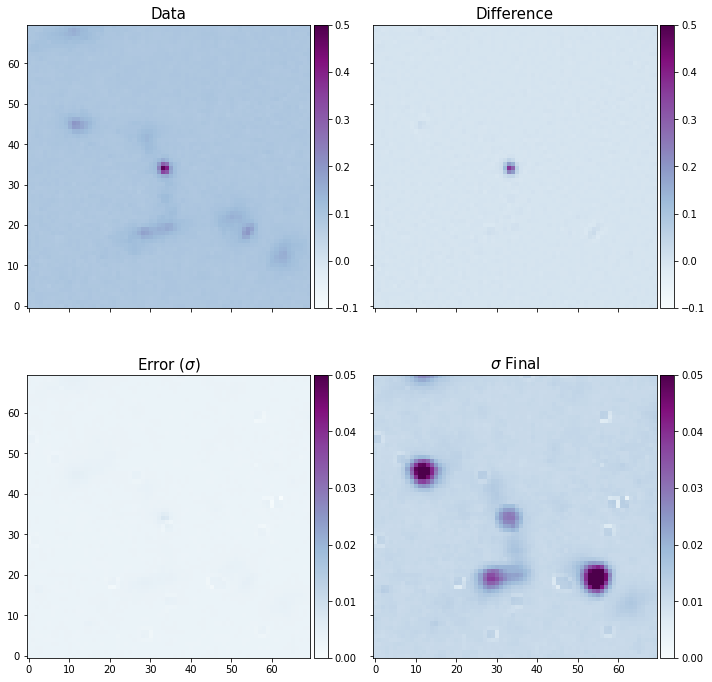

In [117]:
fig,ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)

ax[0,0].set_title(r'Data',fontsize=15)
ax[0,1].set_title('Difference',fontsize=15)
ax[1,0].set_title(r'Error ($\sigma$)',fontsize=15)
ax[1,1].set_title(r'$\sigma$ Final',fontsize=15)

im1 = ax[0,0].imshow(stamp,vmin=-0.1,vmax=0.5,origin='lower',cmap='BuPu')
im2 = ax[0,1].imshow(diff,vmin=-0.1,vmax=0.5,origin='lower',cmap='BuPu')
im3 = ax[1,0].imshow(errstamp,vmin=0,vmax=0.05,origin='lower',cmap='BuPu')
im4 = ax[1,1].imshow(sigma,vmin=0,vmax=0.05,origin='lower',cmap='BuPu')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im4, cax=cax, orientation='vertical')

plt.tight_layout()
#plt.savefig('uncertainty_prop')
plt.show()